In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [2]:
music.head()

,duration,loudness,bpm
0,184,18,105
1,134,34,90
2,243,43,78
3,186,36,75
4,122,22,120


In [3]:
# loading libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# create design matrix X and target vector y
X = np.array(music.iloc[:, 0:2]) 	# end index is exclusive
y = np.array(music['bpm']) 	# another way of indexing a pandas df

# split into train (75% of data) and test(25% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [4]:
# loading library
from sklearn.neighbors import KNeighborsRegressor as knn

# creating odd list of K for KNN
neighbors = list(range(1,20,2))

# empty list that will hold cv scores
cv_scores = []

# perform 3-fold cross validation to determine best k value
for k in neighbors:
    knnr = knn(n_neighbors=k)
    scores = cross_val_score(knnr, X, y, cv=5)
    cv_scores.append(scores.mean())

cv_scores

[-1.5420036905146752,
 -0.69129893045750535,
 -0.75112624694794228,
 -0.45949483932894353,
 -0.42325890673467548,
 -0.38035541315304222,
 -0.37591101473439714,
 -0.3791196958025394,
 -0.31235683904980632,
 -0.33556985256434441]

The optimal number of neighbors is 17


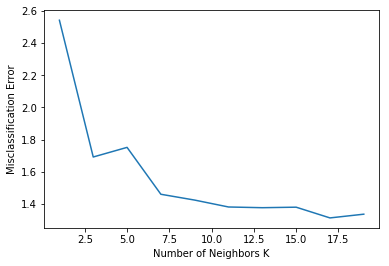

In [5]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [6]:
# creating odd list of K for KNN
neighbors = list(range(1,20,2))

# empty list that will hold cv scores
cv_scores = []

# perform e-fold cross validation
for k in neighbors:
    knnr = knn(n_neighbors=k, weights='distance')
    scores = cross_val_score(knnr, X, y, cv=5)
    cv_scores.append(scores.mean())
    
cv_scores

[-1.5420036905146752,
 -0.58665301008405013,
 -0.50874768425325767,
 -0.30236783457632405,
 -0.27446776397647354,
 -0.26006423412174728,
 -0.24753100417626311,
 -0.23398053977130945,
 -0.22260040335155945,
 -0.2267191738795554]

The optimal number of neighbors is 17


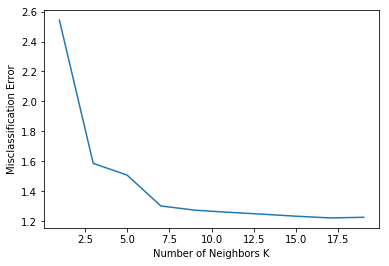

In [7]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [8]:
#determine whether to use unweighted or weighted model

knnr_uw = knn(n_neighbors=5)
knnr_w = knn(n_neighbors=13, weights='distance')

score = cross_val_score(knnr_uw, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knnr_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.75 (+/- 1.16)
Weighted Accuracy: -0.25 (+/- 0.67)


In conclusion, we are at a huge risk of overfitting due to the sparse amount of data that we have to work with making it difficult to set aside a holdout to test against.